# Linear Discriminant Analysis
Redução de dimensionalidade e classificação.

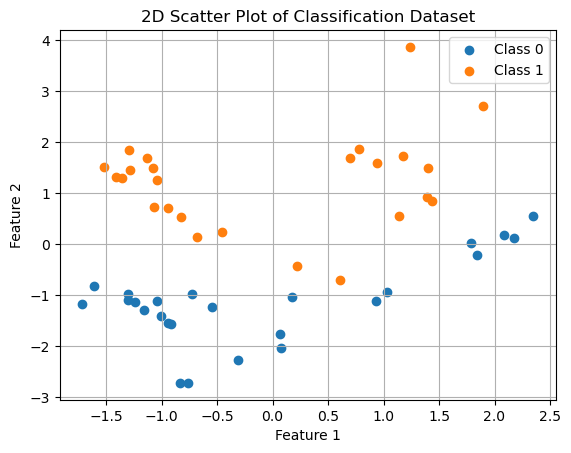

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
x, y = make_classification(50, 2, n_redundant=0, n_repeated=0)
for class_label in np.unique(y):
    # Select points for each class
    class_points = x[y == class_label]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f"Class {class_label}")

# Adding labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Scatter Plot of Classification Dataset")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
x1 = []
x2 = []
for i in range(x.shape[0]):
    if y[i] == 0:
        x1.append(i)
    else:
        x2.append(i)
x1 = np.array(x1)
x2 = np.array(x2)
u1 = np.mean(x[x1], 0)
u2 = np.mean(x[x2], axis=0)

In [34]:
s1 = np.cov(x[x1], rowvar=False)
s2 = np.cov(x[x2], rowvar=False)
spooled = (x1.shape[0]/x.shape[0])* s1 + (x2.shape[0]/x.shape[0])* s2
spooled.shape

(2, 2)

In [38]:
l = np.linalg.inv(spooled) @ (u1 - u2)
l

array([ 1.00734838, -3.54654275])

In [ ]:
projection = l @ x.T
projection

In [ ]:


for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    print(class_points)
    plt.scatter(class_points[:], class_points[:], label=f"Class {class_label}")

# Adding labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Scatter Plot of Classification Dataset")
plt.legend()
plt.grid(True)
plt.show()

[7.71326805 2.58330414 1.46804529 2.43511024 2.56500273 6.31244906
 0.38015062 2.85637873 3.83840294 4.8863238  3.93375229 2.72064652
 4.51214089 2.13106088 4.60375323 3.36076769 3.79093544 8.78055647
 4.37281631 2.69160793 1.7462576  8.8675343  1.26227751 1.69477402
 7.26243905]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed